# Introduction to ML projects

<img src="https://www.mrtfuelcell.polimi.it/images/logo_poli.jpg" height="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Python_logo_and_wordmark.svg" height="150">

A2A ML Course - day 3 - 04/10/2024

Maciej Sakwa, Micheal Wood, Emanuele Ogliari

## Outline

1. Machine Learining project structure
2. Hands-on ML project:
    - Getting the data and problem definition
    - Explorative Data Analysis
    - Feature Engineering
    - Model development
    - Results

## Learning obejctives

* Understand the necessary steps to complete a ML project
* Estimate the timeframe required for a ML project
* First hand experience with programming a simple ML project

---

## Machine Learning project structure

<img src="https://freesvg.org/img/Brain-Computer.png" width="300">

Despite the numerous possible projects that can be solved using Machine Learning and Deep Learning the general project structure to follow will be almost the same every time. 

Surprisingly, the the biggest decisions that have to be made are not about the ML or DL models, **they are about data**.

This lesson is created to give you understanding of the necessary steps needed to acomplish any ML project no matter of the size of the dataset. With hands-on experience, you will be able to understand where lies the actual difficulty of ML projects.

### Structure outline

<img src="https://github.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/blob/main/images/project%20structure.png?raw=true" width="800">


To summarise the main steps can be described as:

| N° | Step | Details |
| --- | --- | --- |
|1. | **GET DATA** | Acquire and curate the dataset. Define the problem to solve |
|2. | **EDA** | Explore the data to understand how (and **if**!) you can use it to solve the problem |
|3. | **FEATURE ENG.** | Transform the data to better fit your needs |
|4. | **MODELING** |Develop ML/DL models, test them, fine tune them for better results |
|5. | **PRESENT AND LAUNCH** | Get feedback from experts in topic, launch your project on the platform of choice|

The **IF** in the second point is crucial for development of *useful* ML projects.
ML is often called a **black-box**. However it is not a *magic* black-box.
You can not solve *any* problem using *any* data. The data has to facilitate the solution of the problem.

>**A reasonable data-driven problem definition is necessary for development of good ML projects.**

Development of ML projects should come from cooperation between Data Scientists and Engineers who understand the topic through and through.

---

## Hands-on ML project

### 1. Get the data and define the problem

Any project has to start somewhere, an ML project starts with data acquisition. In reality, the process of data acquisition and preprocessing is a highly complex problem in itself. So big companies have people to do that for them (so called *Data Engineers*) 

Fortunately for us, let's consider the step already done and let's begin with loading our csv datasets.

*Replace links with github*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We load two datasets:
1. The electricity generation in Spain
2. The weather data from 5 big cities in Spain

In [2]:
data_energy = pd.read_csv('https://raw.githubusercontent.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/refs/heads/main/data/energy_supply.csv')
data_weather = pd.read_csv('https://raw.githubusercontent.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/refs/heads/main/data/weather_features.csv')

This tutorial will serve you as a guideline to **supervised learning** branch of Machine Learning algorithms (sometimes also called **shalow learning**).

**The task that we will try to perform is to predict the actual electricity price in Spain knowing the actual generation data (and weather parameters) in the country.**

For that purpose, we will use the simplest algorithm in the ML sphere - the *Linear Regeression*

### 2. Explorative data analysis

In reality, it is very hard to *decouple* EDA from Feature Engineering. **It's a loop, an iterative process.**  However, for the sake of learning, as EDA let's just give a look to what we loaded. For now let's focus on the energy dataset data_energy. The other one (data_weather) will be usefull later.

Try using the `.describe()` and `.info()` methods. Also list all the columns in the dataset.

In [3]:
# Try your code before the "#" sign

Let's do a short excercise to refresh the pandas syntax. Do you remember that you can use a list to extract several columns? Let's try it here:

In [4]:
fossil_list = [
    'generation fossil brown coal/lignite',
    'generation fossil coal-derived gas',
    'generation fossil gas',
    'generation fossil hard coal',
    'generation fossil oil',
    'generation fossil oil shale',
    'generation fossil peat']

hydro_list = [
    'generation hydro pumped storage aggregated',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage',
    'generation hydro water reservoir',
    'generation marine']

In [5]:
data_energy_fossils = data_energy[fossil_list].copy() # Filter the data to contain only the fossil fuels

Also, do you remember that you create new columns? For that reason we can use aggregative functions that we learned last time. Create the `'total'` column by using a `.sum()` function. <br> For it to work we have to specify the axis along which we sum. The column axis is the second one, so we have to wrice `axis=1` in the parentheses.

In [6]:
data_energy_fossils['total'] = data_energy_fossils.sum(axis=1) # Create the new colum

As you can see the dataset that we are working with is a **time series** dataset

---

**Working with time series data in pandas** 

<img src="https://miro.medium.com/v2/resize:fit:650/0*MJtKLn0wgompp9lJ.jpeg" width="500">

Time series datasets are probably one of the most important and most common form of data that we can acquire. In fact, time flies (and does not stop) so it is quite obvious that people wanted to know and see how things change with time. Time series data do exacly that. Initially working with a new form of data might be a bit frightening. However, there is nothing to worry about! In fact, time series data is an organised form of tabular data. As pandas comes packed with tools to work with tabular data, it is not a surprise it can handle well time series datasets. <br> pandas has many built-in functions and tools to help us accomplish that.

The rule of thumb when working with time series datasets in pandas is to make it the **index** of the Dataframe (so the first column).



In [7]:
data_energy.index = pd.to_datetime(data_energy['time'], utc=True)
data_energy.drop(columns='time', inplace=True)

In this piece of code we set the **index** to be the time column. We switch it to date time format by using the function `pd.to_datetime()`. As the `'time'` column becomes redundant, we can remove it using the `.drop()` method.

Having the datetime as the Dataframe index allows for easy time-based filtering, for example:

In [8]:
data_energy.loc['2017-01-01':'2017-01-31']

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,338.0,900.0,0.0,5401.0,5959.0,176.0,0.0,0.0,0.0,NaN,...,265.0,0.0,1825.0,1.0,NaN,1826.0,23326.0,23393.0,58.23,68.20
2017-01-01 01:00:00+00:00,337.0,908.0,0.0,4753.0,5723.0,175.0,0.0,0.0,0.0,NaN,...,265.0,0.0,1814.0,5.0,NaN,1823.0,22287.0,21909.0,51.95,63.60
2017-01-01 02:00:00+00:00,335.0,915.0,0.0,4321.0,5523.0,175.0,0.0,0.0,0.0,NaN,...,263.0,0.0,1792.0,10.0,NaN,1777.0,21038.0,20615.0,47.27,59.54
2017-01-01 03:00:00+00:00,336.0,904.0,0.0,4320.0,5295.0,175.0,0.0,0.0,0.0,NaN,...,263.0,0.0,1712.0,24.0,NaN,1746.0,20079.0,19628.0,45.49,56.52
2017-01-01 04:00:00+00:00,336.0,929.0,0.0,3920.0,5252.0,176.0,0.0,0.0,0.0,NaN,...,262.0,0.0,1662.0,30.0,NaN,1662.0,19841.0,19252.0,44.50,54.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-31 19:00:00+00:00,374.0,656.0,0.0,10127.0,6560.0,321.0,0.0,0.0,0.0,NaN,...,314.0,0.0,4239.0,51.0,NaN,4050.0,37279.0,36661.0,83.69,96.37
2017-01-31 20:00:00+00:00,376.0,590.0,0.0,8080.0,6618.0,321.0,0.0,0.0,0.0,NaN,...,312.0,0.0,4677.0,38.0,NaN,4548.0,36426.0,36023.0,80.69,89.65
2017-01-31 21:00:00+00:00,378.0,558.0,0.0,7145.0,6610.0,322.0,0.0,0.0,0.0,NaN,...,301.0,0.0,4828.0,16.0,NaN,4795.0,33617.0,33281.0,79.10,87.49


As an excercise, try to extract the first three months of 2016, and save it as `data_energy_time_slice`.

In [9]:
data_energy_time_slice = data_energy.loc['2016-01':'2016-03'] # Remove the dots and complete the query, remember to add .copy() at the end

It will be useful when we will try to plot the data.

For example the code below, let's you plot the energy generation by source. We can use the time slicing to take a closer look to some periods of time. <br>Try to experiment with the plot. You can add or remove different columns, change the colors, scales, time range, ect...

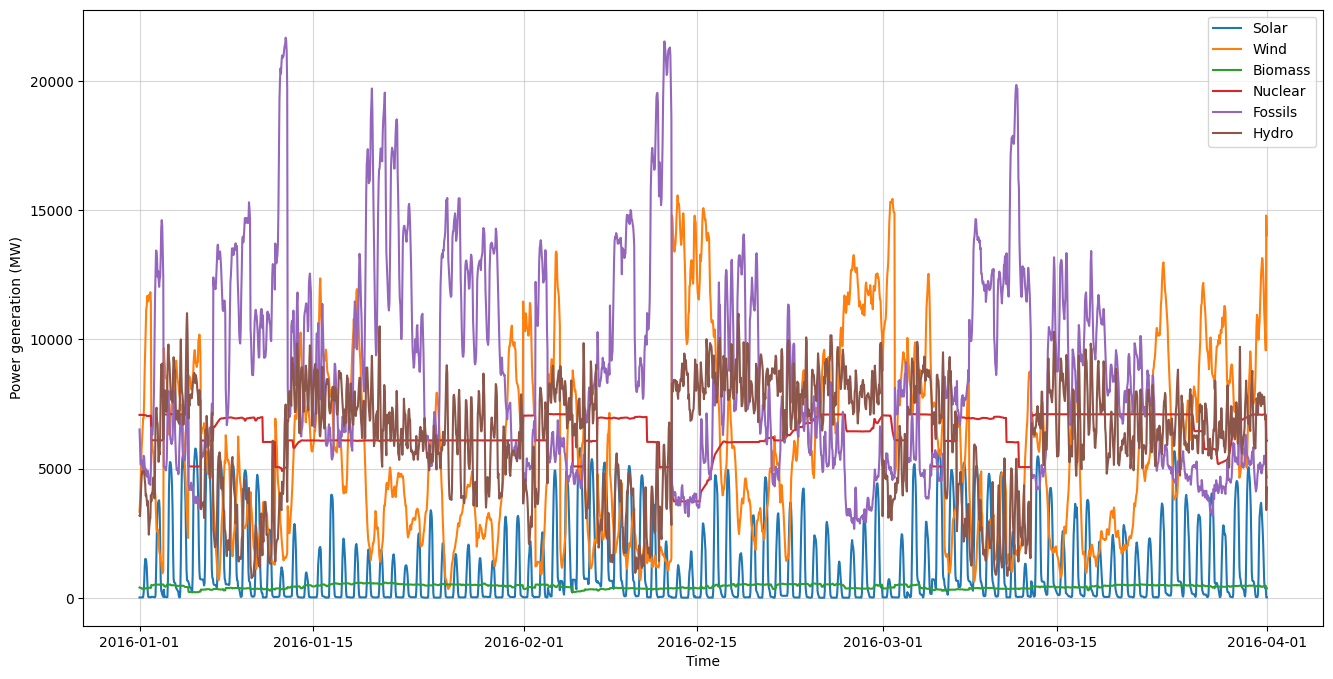

In [10]:
# Initialize the figure
plt.figure(figsize=(16, 8))

# Single column data
plt.plot(data_energy_time_slice['generation solar'], label='Solar')
plt.plot(data_energy_time_slice['generation wind onshore'], label='Wind')
plt.plot(data_energy_time_slice['generation biomass'], label='Biomass')
plt.plot(data_energy_time_slice['generation nuclear'], label='Nuclear')

# Aggregated data from our defined lists
plt.plot(data_energy_time_slice[fossil_list].sum(axis=1), label='Fossils') 
plt.plot(data_energy_time_slice[hydro_list].sum(axis=1), label='Hydro')

# Visuals
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power generation (MW)')
plt.grid(which='major', alpha = 0.5)

plt.show()

Now, let's see how the energy prices change in the same period. Try to plot the spot price and the day ahead price. The corresponding column names are `'price actual'` and `'price day ahead'`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


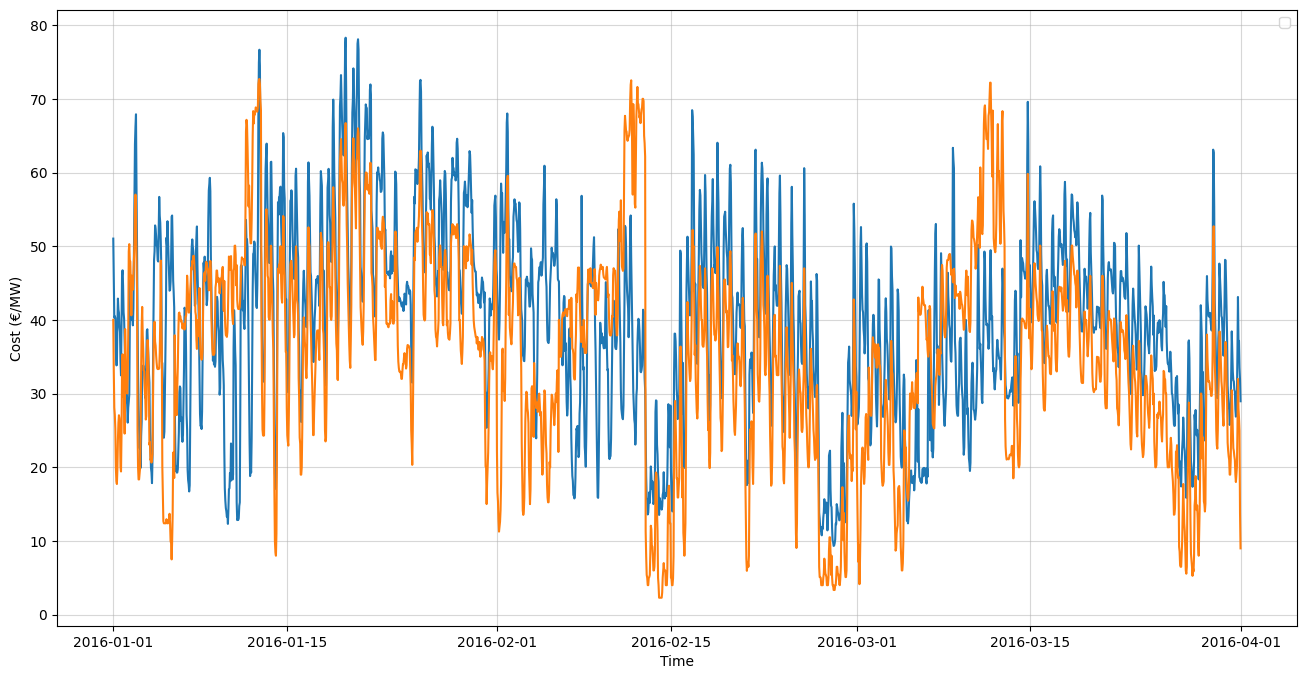

In [11]:
# Initialize the figure
plt.figure(figsize=(16, 8))

plt.plot(data_energy_time_slice['price actual'])
plt.plot(data_energy_time_slice['price day ahead'])

# Visuals
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cost (€/MW)')
plt.grid(which='major', alpha = 0.5)

plt.show()

*What are some conclusions we can draw here? Do you see some correlations?*

We can quantify the correlations by calling the .corr() function. By default, it calculates the pearsons coefficient $\rho_{X, Y}$ between each two columns $X$ and $Y$, for all the columns in the dataframe:

$$
 \rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}
$$

Where $cov(X, Y)$ is the covariance of the two columns, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of columns. Let's try it out:

In [12]:
data_energy.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229809,NaN,-0.021660,0.433522,0.459530,NaN,NaN,NaN,NaN,...,-0.346343,NaN,-0.068658,-0.008713,NaN,-0.072368,0.085216,0.083288,0.108945,0.142369
generation fossil brown coal/lignite,0.229809,1.000000,NaN,0.499808,0.768710,0.314869,NaN,NaN,NaN,NaN,...,0.282810,NaN,-0.434118,0.042306,NaN,-0.436031,0.278503,0.280461,0.567905,0.364088
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,-0.021660,0.499808,NaN,1.000000,0.541635,0.309623,NaN,NaN,NaN,NaN,...,0.275053,NaN,-0.397298,0.080171,NaN,-0.397303,0.543711,0.548913,0.640895,0.461706
generation fossil hard coal,0.433522,0.768710,NaN,0.541635,1.000000,0.440837,NaN,NaN,NaN,NaN,...,0.170235,NaN,-0.441853,0.047356,NaN,-0.444490,0.394291,0.396564,0.671596,0.465641
generation fossil oil,0.459530,0.314869,NaN,0.309623,0.440837,1.000000,NaN,NaN,NaN,NaN,...,-0.175741,NaN,-0.051787,0.096435,NaN,-0.058244,0.498637,0.497089,0.292793,0.284679
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage aggregated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **NB:** Why do we check for correlation of inputs? In linear regression the outputs are defined as a linear response to the input parametrs: $ y_i = w_0 + w_1 x_{i1} + w_2 x_{i2} ... + w_p x_{ip} + \epsilon_i $, hence we can assume that if we find highly correlated features, the prediction will be more accurate. Surprisingly, this is true also for other models commonly used in ML, so it is considered a good practice to study the correlation. 


There is a lot of empty NaN values! It's either because a lot of values are missing, or the columns are 0 valued, let's check:

In [13]:
data_energy.sum()

generation biomass                             1.344023e+07
generation fossil brown coal/lignite           1.570268e+07
generation fossil coal-derived gas             0.000000e+00
generation fossil gas                          1.970545e+08
generation fossil hard coal                    1.491581e+08
generation fossil oil                          1.045462e+07
generation fossil oil shale                    0.000000e+00
generation fossil peat                         0.000000e+00
generation geothermal                          0.000000e+00
generation hydro pumped storage aggregated     0.000000e+00
generation hydro pumped storage consumption    1.666661e+07
generation hydro run-of-river and poundage     3.406781e+07
generation hydro water reservoir               9.129885e+07
generation marine                              0.000000e+00
generation nuclear                             2.195312e+08
generation other                               2.110771e+06
generation other renewable              

There is a lot of columns with 0-values! Let's remove them:

In [14]:
zero_columns = [
    'generation fossil coal-derived gas', 
    'generation fossil oil shale', 
    'generation fossil peat', 
    'generation geothermal', 
    'generation hydro pumped storage aggregated', 
    'generation marine', 
    'generation wind offshore', 
    'forecast wind offshore eday ahead']

data_energy.drop(columns=zero_columns, inplace=True)

Once we got rid of the zero columns, let's calculate the `.corr()` function again. The output is also a Dataframe, so we can filter it the same way. Let's see what columns impact the actual price the strongest:

In [15]:
data_energy.corr()['price actual'].sort_values(ascending=False)

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465641
generation fossil gas                          0.461706
total load actual                              0.436127
total load forecast                            0.435864
generation fossil brown coal/lignite           0.364088
generation fossil oil                          0.284679
generation other renewable                     0.256181
generation waste                               0.169605
generation biomass                             0.142369
forecast solar day ahead                       0.101402
generation other                               0.100048
generation solar                               0.098488
generation hydro water reservoir               0.071549
generation nuclear                            -0.052596
generation hydro run-of-river and poundage    -0.137106
generation wind onshore                       -0

So the actual price is highly correlated positively with the day ahead price (obviously), but also with fossil fuel based generation, and total generation needed. So the more energy we need, and the more fossil fuels produce, the more expensive the energy gets.

Also it's negavitely correlated with hydro-based generation, and with wind-based generation, they are cheap sources. Surprisingly the PV-based production has low impact on the price. 

Before we move on, let's check for the missing data. Use the .info() and .dropna() methods to get rid of null-values:

In [16]:
data_energy.dropna(inplace=True)
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35018 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35018 non-null  float64
 1   generation fossil brown coal/lignite         35018 non-null  float64
 2   generation fossil gas                        35018 non-null  float64
 3   generation fossil hard coal                  35018 non-null  float64
 4   generation fossil oil                        35018 non-null  float64
 5   generation hydro pumped storage consumption  35018 non-null  float64
 6   generation hydro run-of-river and poundage   35018 non-null  float64
 7   generation hydro water reservoir             35018 non-null  float64
 8   generation nuclear                           35018 non-null  float64
 9   generation other         

To make the task a bit more contemporary let's assume we have no day-ahead knowledge of the system. Simply, let's remove the `'forecast'` columns and the day-ahead price:

In [17]:
forecast_list = [item for item in data_energy.columns.to_list() if 'forecast' in item] + ['price day ahead']
forecast_list

data_energy.drop(columns=forecast_list, inplace = True)

Now we can move on to splitting the dataset.

### 3. Feature engineering

Let's explain some thing first:

>The problem that we are trying to solve can be classified as a standard **regression** task. In theoretical terms, all regression problems are a subset of a more broader Machine Learning group called **supervised learning**.
>
>In **supervised learning**, by the term *supervised* we mean that we have some prior knowledge on the desired outputs that we can use in modeling. It means, that we can teach the model to use some variables we have, to predict the desired output. In more mathematical terms, in **supervised learning** we have a set of variables $\mathbf{X}$, a set of outputs $y$, and we are searching for a function $f(\mathbf{X})$ that approximates the outputs $\hat{y}$ using the inputs $\mathbf{X}$. Of course, the approximation is almost never ideal, as most of the problems that we deal with are highly **nonlinear**, but still we are trying to minimize the difference between the real outputs and the approximated outputs $min(y - \hat{y})$. In reality, we rarely search for the approximating functions on our own, there are countless **ML and DL models** ready to be used. *We only have to optimize the model to work on our data.*
>
>We often call the variables **features** or **inputs**, and the outputs **labels** or **targets**. Moreover, the process of optimizing the approximating function $f(\mathbf{X})$ is often reffered to as **fitting** or **training**.

With all that theory laid out, let's define the **features** and **labels** for our prediction. 

In our case, we want to estimate the actual energy price using the generation data, let's extract the corresponding columns:

In [18]:
input_columns = data_energy.columns.to_list() 
input_columns.remove('price actual')    # Inputs are all columns except for the 'price actual'
label_columns = ['price actual']        # Labels is the 'price actual' column

In [19]:
inputs = data_energy[input_columns].copy()
labels = data_energy[label_columns].copy()

For now we don't do any modifications to the **features** we have in the dataset, let's see what results we get with almost *raw* data.


---

**Basics of Scikit Learn**

<img src="https://raw.githubusercontent.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/refs/heads/main/images/Scikit_learn_logo_small.svg" height="200">


Before we start processing data with the models, we should briefly discuss an amazing python package called **Scikit Learn**. Is is a very robust and surprisingly easy to use library that contains a plethora of basic ML algorithms and data transformations.  As with most of the common libraries, it has an excessive documentation website that can be found [here](https://scikit-learn.org/stable/). It has been first introduced in 2007, and obviously the ML and DL landscape changed significantly since then. 

However, **Scikit Learn** (or sklearn) to this day is a library often used by students and professionals alike due to its simplicity and efficiency, making it **a great entry point into the world of ML**.

The characteristic trait of sklearn is a very rigid module.Class.function structure, where each model or data transformer is loaded as a python Class and various transformations are done by calling the functions. Some of the most common functions inlcude:

- `.fit(X, y)` - fit a model to a dataset
- `.transform(X)` - transform a dataset using a model (can be connected with `.fit()` via `.fit_transform()`)
- `.predict(X)` - predicts the values from a given input
- `.metric(y_1, y_2)` - calculates an error metric between y_1 and y_2, where the `.metric()` is a selected error type, e.g. `.mean_absolute_error(y_1, y_2)`

Of course, this list is not exhaustive. With that, let's import some submodules from sklearn package:

In [20]:
from sklearn import preprocessing, neighbors, ensemble, tree, linear_model

 
 ---


### 4. Model development

4.1. Data Preprocessing

Before we input the data into the model there is one important transformation that we should't forget: **scaling**. 

Each column of our dataframe represents one **feature** of our inputs, and quite naturally each feature takes values from a certain range (or mathematically, they are sampled from a certain population). 

For example, the range of values in the column of `'generation nuclear'` is different from `'generation fossil hard coal'`, because the installed power of nuclear is different from hard coal. We understand that, but the model might have a difficult time understanding why some features are bigger then others, it will naturaly think the bigger features are more important. In this way, we are introducing **bias** into model fitting.

<img src="https://github.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/blob/main/images/hist_fossil_fuels.png?raw=true" height="200">
<img src="https://github.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/blob/main/images/hist_nuclear.png?raw=true" height="200">


If we want the model to avoid this bias in fitting, we have to **scale** the input data. The two most common methods are:
 
- **min-max scaling**
- **standard scaling**


If you are interested you can find more mathematical explainations in the appendix. In our case, we will use the StandardScaler() class from sklearn to scale the values.

In [21]:
scaler = preprocessing.StandardScaler() # Set up the class instance

Now, use `.fit_transform()` to transform our inputs. We do not have to transform the labels.

> **NB:** The output of the scaler comes in the form of a numpy array object. The numpy package will be explained further down the line.

In [22]:
inputs_scaled = scaler.fit_transform(inputs) # Get the inputs
labels_scaled = labels.values.ravel()

The next step is to divide the inputs and the labels in train and test subgroups. As the name implies, we use the first subgroup to train the model and the latter to test it. It should remain unseen in training.

Typically the division is set to be **70-30**, or **80-20**. In time series data, we usualy cut off the newest part of the dataset:

In [23]:
n = len(inputs) 
cutoff = int(0.7*n) # Set the cutoff threshold at 70% of the length of the input array

train_inputs = inputs_scaled[:cutoff]   # Cut before
train_labels = labels_scaled[:cutoff]   # Cut before

test_inputs = inputs_scaled[cutoff:]    # Cut after
test_labels = labels_scaled[cutoff:]    # Cut after

You can visualise the division with the cell below:

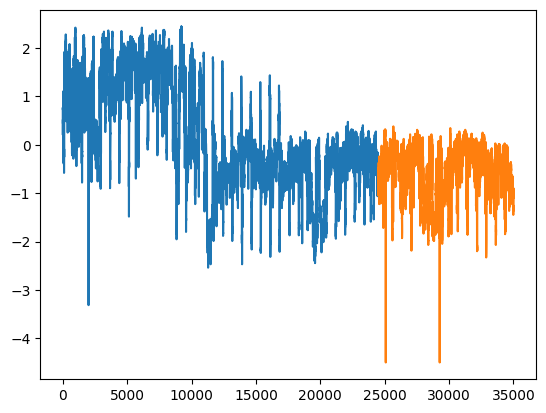

In [24]:
plt.plot(np.arange(0, cutoff), train_inputs[:, 0])
plt.plot(np.arange(cutoff, n), test_inputs[:, 0])
plt.show()

4.2. Training models

Once the data is set up, the next step is usually benchmarking some of the common models that are used to solve similar problems.

In theory, some theory knowledge is necessary to properly set up and use the models. In practice, everything can be easily done without knowing the theory behind the models. We can easily treat them like **black-boxes**.

The general goal of this lesson is to get you familiar with the *structure* of the project, not with the ins and outs of the models. So for now we will just proceed with some selected models and see the results. However, if you want to learn more about the models that we use here, feel free to check out the appendix where you can find details on how each model functions.

We can declare each model in the same way we set up the scaler:

In [25]:
lr = linear_model.LinearRegression()

In the parentheses, you can tweak some parameters (also called **hyperparameters**), but for now let's keep the default options.

To train the model, we can call the `.fit()` method. As this is a *supervised* model, we specify the train inputs and labels. <br> *It might take a minute, but it depends on the model.*

In [26]:
lr.fit(X=train_inputs, y=train_labels)

LinearRegression()

Finally, we can call the `.predict()` method with test inputs to see how the model performs with unseen data:

In [27]:
results_lr = lr.predict(test_inputs)

We can quickly visualise the results with a plot (we can declare it in a function to quickly reuse it later):

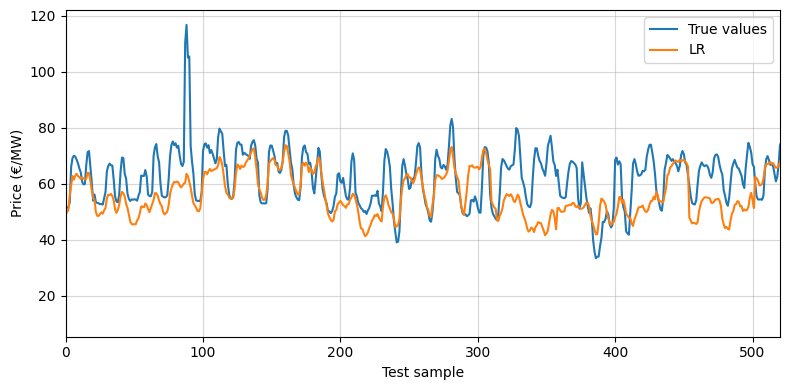

In [28]:
def plot_results(results:np.array, model_name:str, x_range=(0, 520)) -> None:   
    plt.figure(figsize=(8, 4))

    # Plots
    plt.plot(test_labels, label='True values')
    plt.plot(results, label=model_name)

    # Visuals
    plt.xlim(x_range)
    plt.xlabel('Test sample')
    plt.ylabel('Price (€/MW)')
    plt.grid(which='major', alpha = 0.5)

    # Tidy up
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_results(results_lr, 'LR')

And that's it! We examined the data, explored some features, then picked and trained a model, and displayed the results. **Buon lavoro!**

However, we are not done yet. Let's benchmark some other common simple models, and get some detailed metrics. 

Let's quickly save the things that we did as functions:

In [29]:
def train_and_pred(model, X_train, y_train, X_test):
    
    # Fit the model
    model.fit(X_train, y_train)
    # Predict with the model
    y_test = model.predict(X_test)

    return y_test

Now let's train several predictors to check how they perform on our data:

- Lasso Regression

In [30]:
lasso = linear_model.Lasso()

results_lasso = train_and_pred(lasso, train_inputs, train_labels, test_inputs)

- Decision Tree regressor

In [31]:
dtr = tree.DecisionTreeRegressor()
results_dtr = train_and_pred(dtr, train_inputs, train_labels, test_inputs)

**Excercise:** Try to implement the K-Nearest Neighbors regressor, save the results as `results_knn`. You can find the syntax reference [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

- K-Nearest Neighbors

In [32]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
results_knn = train_and_pred(knn, train_inputs, train_labels, test_inputs)

Let's collect the models' results as a dictionary: <br>
*You can add another row if you did the excercise*

In [33]:
results = {
    'LR': results_lr,
    'Lasso': results_lasso,
    'DTR': results_dtr,
    'KNN': results_knn
}

### 5. Results

Once the models are trained, we can check how they perform using various metrics. Let's load the submodule:

In [34]:
from sklearn import metrics

The most common metrics in regression problems are:

* the mean absolute error: $ MAE = |y_{true}-y_{pred}| $ 
* the root mean square error: $ RMSE = \sqrt{y^2_{true}-y^2_{pred}}$

where the $y_{true}$ is the vector of true values (or `test_labels` in our case) and the $y_{pred}$ are the predicted values for a given model. 

> **NB:** You can also get the percentage versions of the metrics by dividing the value by $y_{pred}$. Be careful though! It is dangerous to do so when the labels are close to zero as the error might skyrocket even for accurate predictions!

Let's define a function that takes the results and the labels and outputs the metrics:

In [35]:
def print_results(model:str, results:np.ndarray, labels:np.ndarray) -> None:
    
    # Calculate the metrics using the labels and the results
    mae = metrics.mean_absolute_error(labels, results)
    rmse = np.sqrt(metrics.mean_squared_error(labels, results))
    mape = np.mean(mae / labels)
    
    # Print out the results
    print(f'Results for model {model}: \n- MAE:\t{mae:.02f}\n- RMSE:\t{rmse:.02f}\n- MAPE:\t{mape*100:.02f}%')

**Excercise:** Try to calculate the normalized MAE defined as the MAE value divided by the average output value:

Now let's see the results:

In [36]:
for name, model in results.items():
    print_results(model=name, results=model, labels=test_labels)

Results for model LR: 
- MAE:	12.02
- RMSE:	14.36
- MAPE:	20.13%
Results for model Lasso: 
- MAE:	11.59
- RMSE:	13.83
- MAPE:	19.41%
Results for model DTR: 
- MAE:	14.66
- RMSE:	18.32
- MAPE:	24.55%
Results for model KNN: 
- MAE:	13.68
- RMSE:	17.29
- MAPE:	22.91%


We can also try to plot them:

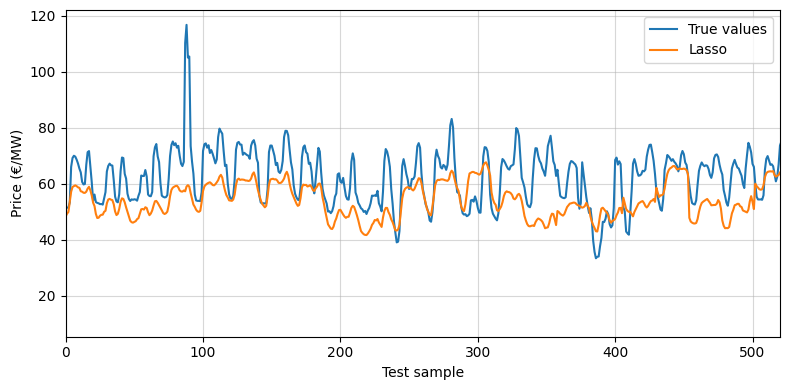

In [37]:
plot_results(results_lasso, 'Lasso')

Try to plot the other models. *Can you create a plot that has all of them?*

Which model performs the best?

And that's it! You developed your first ML model. 20% error is not that great though, we might have to go back in the loops to improve our results...

---


## Going back the loops

Now that the model is trained and benchmark comes the hard part, we have to evaluate our work. If our model's performance is satisfactory, we are done. But unfortunatly our model's performance is not that great.

**Because of that, we have to take a few steps backwards...**

There are a couple of options to improve the performance of our ML system. One idea is to try out different models. Maybe there are some that could work better with our dataset. But as we've seen, the difference in performance is not that big model-to-model. 

To boost the performance, we have some options, such as:

- explore and benchmark different models, check if it should be more robust or smaller, 
- explore the data and find new relations between features,
- explore the problem deeper, try to relate it to real life and understand what are the natural correlations between phenomena to add new features.

E.g., understanding what impacts the energy price in real life leads to creation of better predictive models.

For now, let's experiment by adding some features to the model:

### Aggregated and mixed features

Sometimes simple mathematical operations on existing features can create new one that are stronger, let's check the correlation table again:

In [38]:
data_energy.corr()['price actual'].sort_values(ascending=False)

price actual                                   1.000000
generation fossil hard coal                    0.466703
generation fossil gas                          0.461914
total load actual                              0.435872
generation fossil brown coal/lignite           0.364205
generation fossil oil                          0.285351
generation other renewable                     0.256400
generation waste                               0.169293
generation biomass                             0.142795
generation other                               0.099757
generation solar                               0.098768
generation hydro water reservoir               0.072203
generation nuclear                            -0.051825
generation hydro run-of-river and poundage    -0.136756
generation wind onshore                       -0.221762
generation hydro pumped storage consumption   -0.427033
Name: price actual, dtype: float64

Some fossil fuels have an impact on increasing the price, on the other hand the renewables reduce it. 

Let's create new columns with a sum of fossils and alternative fuels to check what is the total impact they have:

In [39]:
# Create lists with all the fossil fuels

fossil_list = [
    'generation fossil hard coal',
    'generation fossil gas',
    'generation fossil brown coal/lignite',
    'generation fossil oil']

# Create lists with all the alternative fuels

alternatives_list = [
    'generation other', 
    'generation other renewable',
    'generation solar', 
    'generation hydro water reservoir', 
    'generation nuclear', 
    'generation hydro run-of-river and poundage', 
    'generation biomass',
    'generation wind onshore',
    'generation hydro pumped storage consumption']

data_energy['generation fossil total'] = data_energy[fossil_list].sum(axis=1)
data_energy['generation alternatives total'] = data_energy[alternatives_list].sum(axis=1) 

Also let's calculate the share they have in the total energy mix at a given hour (we simply divide the sum of load by the total load):

In [40]:
data_energy['generation alternatives share'] = data_energy['generation alternatives total'] / data_energy['total load actual']
data_energy['generation fossil share'] = data_energy['generation fossil total'] / data_energy['total load actual']

Now let's check the impact of the new features we added:

In [41]:
data_energy.corr()['price actual'].sort_values(ascending=False)

price actual                                   1.000000
generation fossil total                        0.526920
generation fossil hard coal                    0.466703
generation fossil gas                          0.461914
total load actual                              0.435872
generation fossil share                        0.399591
generation fossil brown coal/lignite           0.364205
generation fossil oil                          0.285351
generation other renewable                     0.256400
generation waste                               0.169293
generation biomass                             0.142795
generation other                               0.099757
generation solar                               0.098768
generation hydro water reservoir               0.072203
generation nuclear                            -0.051825
generation hydro run-of-river and poundage    -0.136756
generation alternatives total                 -0.191822
generation wind onshore                       -0

Very nice, the `'total'` and `'share'` columns have quite high correlations with the price. Let's move to time-based feautures. 

In [42]:
data_energy.drop(columns=fossil_list+alternatives_list, inplace=True)

### Time features

Adding some time-based features might boost the model's performance if there are some linear temporal dependencies in our model. Let's quickly add some time-based featuers by using our fancy date time index:

In [43]:
data_energy['hour'] = data_energy.index.hour            # Adds hour column
data_energy['day_of_week'] = data_energy.index.weekday  # Adds weekday column
data_energy['month'] = data_energy.index.month          # Adds month column

To check that what we added is correct, we can quickly draw plots of the average price per hour, per week day and per month using grouping:

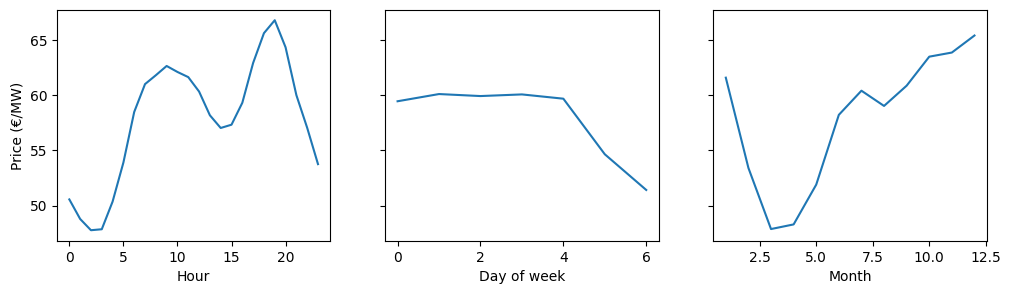

In [44]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)

ax[0].plot(data_energy.groupby('hour')['price actual'].mean())
ax[0].set_xlabel('Hour')
ax[1].plot(data_energy.groupby('day_of_week')['price actual'].mean())
ax[1].set_xlabel('Day of week')
ax[2].plot(data_energy.groupby('month')['price actual'].mean())
ax[2].set_xlabel('Month')

ax[0].set_ylabel('Price (€/MW)')

plt.show()

The trends are very clear!

But... they are not exactly linear, so the model might have problems findning the correct weights for them. This is why categorical features are often introduced.

### Categorical features

As the name implies, the categorical features specify a certain **category** to which each input belongs.

Let's consider for example the days of the week, we can clearly see that the energy price is quite constant throughout the workdays, but decreases in Saturadays and Sundays. 

To help the model use that information, we can create new column where a **category** is added:

In [45]:
def is_workday(X: pd.Series):
    weekdays_list = []

    for day in X:
        if day < 5:  # We start the count at 0
            weekdays_list.append('weekday')
        elif day == 6:
            weekdays_list.append('sat')
        else:
            weekdays_list.append('sun')
    
    return weekdays_list

Let's run the function and check the result:

In [46]:
data_energy['weekdays'] = is_workday(X = data_energy.day_of_week)
data_energy.head()

,generation waste,total load actual,price actual,generation fossil total,generation alternatives total,generation alternatives share,generation fossil share,hour,day_of_week,month,weekdays
time,,,,,,,,,,,
2014-12-31 23:00:00+00:00,196.0,25385.0,65.41,10156.0,17899.0,0.705101,0.400079,23,2,12,weekday
2015-01-01 00:00:00+00:00,195.0,24382.0,64.92,10437.0,17186.0,0.704864,0.428062,0,3,1,weekday
2015-01-01 01:00:00+00:00,196.0,22734.0,64.48,9918.0,16682.0,0.733791,0.436263,1,3,1,weekday
2015-01-01 02:00:00+00:00,191.0,21286.0,59.32,8859.0,16173.0,0.759795,0.416189,2,3,1,weekday
2015-01-01 03:00:00+00:00,189.0,20264.0,56.04,8313.0,16118.0,0.795401,0.410235,3,3,1,weekday


We can do the same for the hours, as the trend is again highly non linear:

- It's higher in the business and rush hours
- It's lower in the middle of the day (siesta time)
- It's even lower in the night

Let's create another category that uses that:

In [47]:
def is_rush_hour(X: pd.Series):
    hours_list = []

    for hour in X:
        if ((hour > 8 and hour < 13) or (hour > 17 and hour < 21)): # Between 9-14 and 18-22
            hours_list.append('rush_hour')
        elif (hour >= 13 and hour <= 17):
            hours_list.append('siesta_hour')
        else:
            hours_list.append('night_hour')

    return hours_list

Let's check:

In [48]:
data_energy['rush_hours'] = is_rush_hour(data_energy.hour)
data_energy.head()

,generation waste,total load actual,price actual,generation fossil total,generation alternatives total,generation alternatives share,generation fossil share,hour,day_of_week,month,weekdays,rush_hours
time,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,196.0,25385.0,65.41,10156.0,17899.0,0.705101,0.400079,23,2,12,weekday,night_hour
2015-01-01 00:00:00+00:00,195.0,24382.0,64.92,10437.0,17186.0,0.704864,0.428062,0,3,1,weekday,night_hour
2015-01-01 01:00:00+00:00,196.0,22734.0,64.48,9918.0,16682.0,0.733791,0.436263,1,3,1,weekday,night_hour
2015-01-01 02:00:00+00:00,191.0,21286.0,59.32,8859.0,16173.0,0.759795,0.416189,2,3,1,weekday,night_hour
2015-01-01 03:00:00+00:00,189.0,20264.0,56.04,8313.0,16118.0,0.795401,0.410235,3,3,1,weekday,night_hour


Great!

However, we can't just feed the category labels to the model. It would not know what to do with text.

For that reason, we have to perform **encoding**, and more specifically the One-Hot encoding.

OneHot Encoding transforms the input column into a number columns equal to the number of categories. Each column corresponds to one category. For each row the correct category column is marked with 1 (hot) and the rest are left as 0 (cold).


<img src="https://github.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/blob/main/images/one_hot.png?raw=true" height="300">


This method allows the model to give independent weights to different categories.

Fortunately, there is a `sklearn` implementation of this method. Let's declare it, transform the categorical columns from our data:

In [49]:
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore', categories='auto', sparse_output=False) # Load the engine
encoder.set_output(transform='pandas')                                                                 # Set the output to a pandas df
inputs_categorical = encoder.fit_transform(data_energy[['weekdays', 'rush_hours', 'month']])           # Transform the columns

In fact, we end up with a table like above:

In [50]:
inputs_categorical

,weekdays_sat,weekdays_sun,weekdays_weekday,rush_hours_night_hour,rush_hours_rush_hour,rush_hours_siesta_hour,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
time,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-01-01 00:00:00+00:00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-12-31 19:00:00+00:00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-12-31 20:00:00+00:00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now, let's remove the 'text' category columns from our df. We don't need them anymore.

In [51]:
data_energy.drop(columns=['weekdays', 'rush_hours'], inplace = True)
data_energy.head()

,generation waste,total load actual,price actual,generation fossil total,generation alternatives total,generation alternatives share,generation fossil share,hour,day_of_week,month
time,,,,,,,,,,
2014-12-31 23:00:00+00:00,196.0,25385.0,65.41,10156.0,17899.0,0.705101,0.400079,23,2,12
2015-01-01 00:00:00+00:00,195.0,24382.0,64.92,10437.0,17186.0,0.704864,0.428062,0,3,1
2015-01-01 01:00:00+00:00,196.0,22734.0,64.48,9918.0,16682.0,0.733791,0.436263,1,3,1
2015-01-01 02:00:00+00:00,191.0,21286.0,59.32,8859.0,16173.0,0.759795,0.416189,2,3,1
2015-01-01 03:00:00+00:00,189.0,20264.0,56.04,8313.0,16118.0,0.795401,0.410235,3,3,1


### Auxiliary features

*Extra topic*

We can support our predictions by importing and processing additional data from other sources. Of course this significantly adds to the workload, but often it is necessary to combine various data sources to get good quality of the prediction.

In the beginning of the lesson we imported a secondary dataset that contains weather data for 5 big cities in Spain, let's check it out:

In [52]:
data_weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Extract the names of the cities:

In [53]:
data_weather.city_name.unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

There are 5 cities: Madrit, Barcelona, Valencia, Seville, and Bilbao. For convenience, let's move each city into separate `Dataframes`:

In [54]:
data_weather_valencia = data_weather[data_weather['city_name'] == 'Valencia'].copy()
data_weather_madrid = data_weather[data_weather['city_name'] == 'Madrid'].copy()
data_weather_bilbao = data_weather[data_weather['city_name'] == 'Bilbao'].copy()
data_weather_barcelona = data_weather[data_weather['city_name'] == ' Barcelona'].copy()
data_weather_seville = data_weather[data_weather['city_name'] == 'Seville'].copy()

And now let's put them into a single dictionary:

In [55]:
dictionary_data_weather = {
    'Valencia': data_weather_valencia, 
    'Madrid': data_weather_madrid, 
    'Bilbao': data_weather_bilbao, 
    'Barcelona': data_weather_barcelona, 
    'Seville': data_weather_seville
}

As they are time series datasets, we should remember to add the date time index. We can do it in a loop:

In [56]:
for city, data in dictionary_data_weather.items():
    
    # Add TS index and remove the column
    data.index = pd.to_datetime(data['dt_iso'], utc=True)
    
    # Update the data
    dictionary_data_weather[city] = data

Studying all 5 datasets at the same time might be dificult, let's focus only on the Madrid data for now.

We can connect the madrid dataset with the energy prices from the previous dataset using the `.merge()` method. Merging operation is very useful when we want to make sure that the resulting dataset will have the desired shape. The datasets are connected through a key (a column) that is shared between both sources.

We have to specify the shared column (in our case the TS index) and the merging method ('inner' - keeps shared rows, 'outer' - keeps all rows, 'left' - keeps all rows from the left table, 'right' - the oposite of left). 

<img src="https://datacomy.com/data_analysis/pandas/merge/types-of-joins.png" height="200">


At the first glance merging might be quite complex. But don't worry, we won't use it much. If you want more information on methods of connecting two data sources, have a read [here](https://realpython.com/pandas-merge-join-and-concat/)

After merging with the price actual series it appears at the end of our dataset:

In [57]:
data_weather_madrid.merge(data_energy['price actual'], how='inner', left_index=True, right_index=True)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,price actual
2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,Madrid,267.325,267.325,267.325,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n,65.41
2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+01:00,Madrid,267.325,267.325,267.325,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n,64.92
2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+01:00,Madrid,266.186,266.186,266.186,971,64,1,273,0.0,0.0,0.0,0,800,clear,sky is clear,01n,64.48
2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+01:00,Madrid,266.186,266.186,266.186,971,64,1,273,0.0,0.0,0.0,0,800,clear,sky is clear,01n,59.32
2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+01:00,Madrid,266.186,266.186,266.186,971,64,1,273,0.0,0.0,0.0,0,800,clear,sky is clear,01n,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,2018-12-31 19:00:00+01:00,Madrid,283.560,282.150,285.150,1030,88,1,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n,77.02
2018-12-31 19:00:00+00:00,2018-12-31 20:00:00+01:00,Madrid,280.120,278.150,281.150,1031,52,1,260,0.0,0.0,0.0,0,800,clear,sky is clear,01n,76.16
2018-12-31 20:00:00+00:00,2018-12-31 21:00:00+01:00,Madrid,278.150,278.150,278.150,1030,65,1,340,0.0,0.0,0.0,0,800,clear,sky is clear,01n,74.30
2018-12-31 21:00:00+00:00,2018-12-31 22:00:00+01:00,Madrid,276.570,276.150,277.150,1031,69,2,340,0.0,0.0,0.0,0,800,clear,sky is clear,01n,69.89


Let's save it as a new variable:

In [58]:
data_weather_madrid_with_price = data_weather_madrid.merge(data_energy['price actual'], how='inner', left_index=True, right_index=True)

Now that we have the price included in the dataset, we can check if it has any correlation with the weather parameters:

In [59]:
data_weather_madrid_with_price.corr(numeric_only=True)['price actual'].sort_values(ascending=False)

price actual    1.000000
temp_max        0.086472
temp            0.077462
temp_min        0.055385
pressure        0.020600
weather_id     -0.001315
snow_3h        -0.008360
rain_1h        -0.009768
rain_3h        -0.028311
humidity       -0.048789
clouds_all     -0.056110
wind_deg       -0.082656
wind_speed     -0.241925
Name: price actual, dtype: float64

The correlation are not that strong, but in reality probably both the temperature and the wind will have some impact on the results. Let's extract them. As we have 5 cities we can either get them separately, or aggregated. 

Let's try aggregated first.

Let's check for missing data first:

In [60]:
for city, data in dictionary_data_weather.items():
    
    print(f"There are {data.shape[0]} observations about city: {city}.")

There are 35145 observations about city: Valencia.
There are 36267 observations about city: Madrid.
There are 35951 observations about city: Bilbao.
There are 35476 observations about city: Barcelona.
There are 35557 observations about city: Seville.


And remove it...

In [61]:
for city, data in dictionary_data_weather.items():

    clean_data = data.drop_duplicates(subset='dt_iso', keep='first')

    dictionary_data_weather[city] = clean_data

    print(f"There are {clean_data.shape[0]} observations about city: {city}.")

There are 35064 observations about city: Valencia.
There are 35064 observations about city: Madrid.
There are 35064 observations about city: Bilbao.
There are 35064 observations about city: Barcelona.
There are 35064 observations about city: Seville.


Now, for the aggregation let's use the city's population as the weight for a weighted average:

In [62]:
pop_madrid = 6_791_667
pop_barcelona = 5_474_482
pop_valencia = 2_522_383
pop_seville = 1_519_639
pop_bilbao = 1_037_847

pop_total = pop_madrid + pop_barcelona + pop_valencia + pop_seville + pop_bilbao

Now we can define the weight by dividing the city's population by the total population:

In [63]:
dictionary_weights_temp = {
    'Valencia': pop_valencia / pop_total, 
    'Madrid': pop_madrid / pop_total, 
    'Bilbao': pop_bilbao / pop_total, 
    'Barcelona': pop_barcelona / pop_total, 
    'Seville': pop_seville / pop_total
}

And we can create the `'temp'` and `'wind_speed'` columns as a weighted average:

In [64]:
inputs_weather = pd.DataFrame()

inputs_weather['temp'] = \
    dictionary_data_weather['Valencia']['temp'] * dictionary_weights_temp['Valencia'] + \
    dictionary_data_weather['Madrid']['temp'] * dictionary_weights_temp['Madrid'] + \
    dictionary_data_weather['Bilbao']['temp'] * dictionary_weights_temp['Bilbao'] + \
    dictionary_data_weather['Barcelona']['temp'] * dictionary_weights_temp['Barcelona'] + \
    dictionary_data_weather['Seville']['temp'] * dictionary_weights_temp['Seville']

inputs_weather['wind_speed'] = \
    dictionary_data_weather['Valencia']['wind_speed'] * dictionary_weights_temp['Valencia'] + \
    dictionary_data_weather['Madrid']['wind_speed'] * dictionary_weights_temp['Madrid'] + \
    dictionary_data_weather['Bilbao']['wind_speed'] * dictionary_weights_temp['Bilbao'] + \
    dictionary_data_weather['Barcelona']['wind_speed'] * dictionary_weights_temp['Barcelona'] + \
    dictionary_data_weather['Seville']['wind_speed'] * dictionary_weights_temp['Seville']

inputs_weather['wind_speed_squared'] = inputs_weather['wind_speed'] * inputs_weather['wind_speed']

We save it as a separate dataframe and concatenate with the original one:

In [65]:
inputs_weather

,temp,wind_speed,wind_speed_squared
dt_iso,,,
2014-12-31 23:00:00+00:00,272.965776,2.833795,8.030395
2015-01-01 00:00:00+00:00,272.972129,2.833795,8.030395
2015-01-01 01:00:00+00:00,272.336108,2.923426,8.546421
2015-01-01 02:00:00+00:00,272.333215,2.923426,8.546421
2015-01-01 03:00:00+00:00,272.350097,2.923426,8.546421
...,...,...,...
2018-12-31 18:00:00+00:00,284.272697,1.260798,1.589613
2018-12-31 19:00:00+00:00,281.830036,1.806424,3.263167
2018-12-31 20:00:00+00:00,280.473091,2.500467,6.252336


In [66]:
data_energy = pd.concat([data_energy, inputs_weather], axis=1)
data_energy.dropna(inplace=True)
data_energy.head()

,generation waste,total load actual,price actual,generation fossil total,generation alternatives total,generation alternatives share,generation fossil share,hour,day_of_week,month,temp,wind_speed,wind_speed_squared
2014-12-31 23:00:00+00:00,196.0,25385.0,65.41,10156.0,17899.0,0.705101,0.400079,23.0,2.0,12.0,272.965776,2.833795,8.030395
2015-01-01 00:00:00+00:00,195.0,24382.0,64.92,10437.0,17186.0,0.704864,0.428062,0.0,3.0,1.0,272.972129,2.833795,8.030395
2015-01-01 01:00:00+00:00,196.0,22734.0,64.48,9918.0,16682.0,0.733791,0.436263,1.0,3.0,1.0,272.336108,2.923426,8.546421
2015-01-01 02:00:00+00:00,191.0,21286.0,59.32,8859.0,16173.0,0.759795,0.416189,2.0,3.0,1.0,272.333215,2.923426,8.546421
2015-01-01 03:00:00+00:00,189.0,20264.0,56.04,8313.0,16118.0,0.795401,0.410235,3.0,3.0,1.0,272.350097,2.923426,8.546421


Wind speed has a pretty high negative correlation with the price. It's quite strightforward, the more it blows the stronger the projection of wind energy and the lower the price. Also, probably, strong winds in summer decrease the energy load from cooling.

In [67]:
data_energy.corr()['price actual'].sort_values(ascending=True)

generation alternatives share   -0.469917
wind_speed                      -0.247496
wind_speed_squared              -0.246799
generation alternatives total   -0.191822
day_of_week                     -0.177398
temp                             0.086582
generation waste                 0.169293
hour                             0.237442
month                            0.281495
generation fossil share          0.399591
total load actual                0.435872
generation fossil total          0.526920
price actual                     1.000000
Name: price actual, dtype: float64

### Retrain

Now, with new features in hand, we can redo the initial calculations. 

The steps should be all familiar.

First, we separate the inputs from the labels:

In [68]:
input_columns = data_energy.columns.to_list()
input_columns.remove('price actual')
label_columns = ['price actual']

inputs = data_energy[input_columns].copy()
labels = data_energy[label_columns].copy()

Then, we scale the inputs:

In [69]:
scaler = preprocessing.StandardScaler()
scaler.set_output(transform='pandas')

inputs_scaled = scaler.fit_transform(inputs)
labels_scaled = labels.values.ravel()

... and add the One-Hot categorical table...

In [70]:
inputs_scaled = inputs_scaled.merge(inputs_categorical, how='inner', left_index=True, right_index=True)

And separate the train and test datasets:

In [71]:
n = len(inputs) 
cutoff = int(0.7*n)

X_train = inputs_scaled[:cutoff]
y_train = labels_scaled[:cutoff]

X_test = inputs_scaled[cutoff:]
y_test = labels_scaled[cutoff:]

Let's check the final shape of the training dataset:

In [72]:
inputs_scaled

,generation waste,total load actual,generation fossil total,generation alternatives total,generation alternatives share,generation fossil share,hour,day_of_week,month,temp,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-12-31 23:00:00+00:00,-1.465864,-0.724039,-0.118891,0.035498,0.483948,0.278852,1.661124,-0.501314,1.587697,-2.156601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-01-01 00:00:00+00:00,-1.485807,-0.943317,-0.047592,-0.128676,0.482477,0.523437,-1.661042,-0.001257,-1.602671,-2.155770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,-1.465864,-1.303606,-0.179281,-0.244726,0.661872,0.595119,-1.516600,-0.001257,-1.602671,-2.238891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,-1.565580,-1.620170,-0.447987,-0.361927,0.823145,0.419664,-1.372158,-0.001257,-1.602671,-2.239269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,-1.605466,-1.843602,-0.586526,-0.374591,1.043962,0.367622,-1.227716,-0.001257,-1.602671,-2.237062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,0.149531,0.427661,-0.046830,-0.471300,-0.712880,-0.241140,0.938914,-1.501429,1.587697,-0.678921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-12-31 19:00:00+00:00,0.209360,0.226966,-0.163295,-0.643072,-0.770418,-0.284157,1.083356,-1.501429,1.587697,-0.998147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-12-31 20:00:00+00:00,0.329019,-0.136821,-0.256162,-0.842475,-0.776885,-0.224203,1.227798,-1.501429,1.587697,-1.175484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-12-31 21:00:00+00:00,0.348962,-0.633093,-0.407643,-0.990531,-0.657642,-0.163046,1.372240,-1.501429,1.587697,-1.342626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


And finally, we can retrain the model. 

**Excercise:** Pick any model you want, train it with `.fit()` and predict with `.predict()`. Print the results with `print_results()` and plot them with `plot_results()` functions that we defined before.

In [73]:
new_lr = linear_model.LinearRegression()
new_lr.fit(X_train, y_train)

results_new_lr = new_lr.predict(X_test)

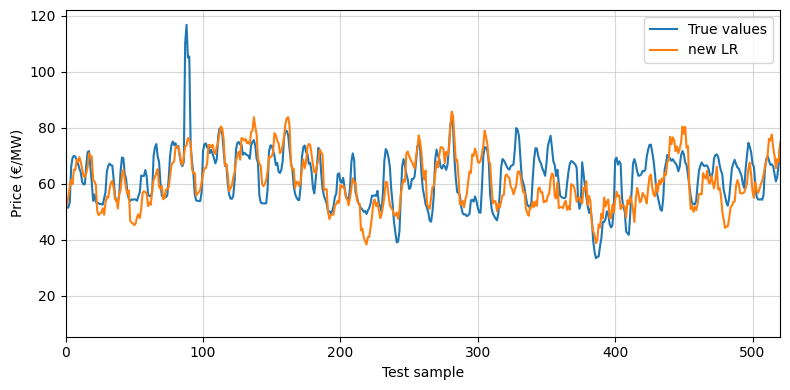

Results for model new LR: 
- MAE:	10.67
- RMSE:	12.86
- MAPE:	17.88%


In [74]:
plot_results(results_new_lr, 'new LR')
print_results('new LR', results_new_lr, y_test)

And we are done! We did a lot of work for quite a small improvement. Sadly, that is often the reality of Data Science... 

In reality, there are many more steps that we could (and should!) have done to ensure the highest possible accuracy, such as:

- Localize and remove the outliers from the dataset - weird, unexpected values, or artifacts might break the probability distribution of a variable
- Analyze the train and test datasets - they should represent similar samples from the same population, e.g. is the distribution of the target in the train dataset similar to the distribution in the test dataset?
- Validation and Cross-Validation - to remove the impact of the train-test split and decrease overfitting (if it's present)

And others...

# Appendix - Theoretical background on used models

### Feature Scaling

- Min-Max scaling - rescales the values to a slected range (usualy 0-1). For 0-1 range the equation takes the form:

$$
    X_{scaled} = \frac{(X - min(X))}{max(X) - min(X)}
$$

- Standard scaling - rescales the values by removing the mean and scaling to unit variance (in statistical terms we calculate the z-scores):

$$
    X_{scaled} = \frac{X - \mu_x}{\sigma_x}
$$

### Linear regression

You probably all know Linear Regression by now. It is a very common statistical model that is often used as an introductory model to Machine Learning.

In Linear Regression the relationship of the output of the model (or the prediction) to the descriptive variables (or the inputs) is modeled as a linear response, which mathematically can be written as:

$$
    y_i = w_0 + w_1 x_{i1} + w_2 x_{i2} ... + w_p x_{ip} + \epsilon_i
$$

where the $y_i$ is the $i-th$ output, $x_1$ to $x_p$ are the features, and $w_1$ to $w_p$ are corresponding learned weights. The $\epsilon$ is a random noise, that has to be taken into account in modeling. This equation in matrix terms becomes simpler:

$$
    \mathbf{y} = \mathbf{X W} + \mathbf{\epsilon}
$$

Fitting such a model becomes a task of finding the parameter matrix $\mathbf{W}$ so that the term $ \mathbf{\epsilon} = \mathbf{y} - \mathbf{X W}$ is minimal.

The classic method of solving this task is through the Ordinary Least Squares method (OLS). In practise the method is minimizing the sum of squares of the differences between the observed dependent variable (or outputs) and the modeled outputs. The objective function for the minimization is given as:

$$ 
    S(W) = min|| \mathbf{y} - \mathbf{X W} || ^ 2
$$

Often it's easier to visualise the procedure as fitting a line, so that the sum of distances between the line and the observed points is the smallest possible:

<img src="https://miro.medium.com/v2/resize:fit:1280/1*nhGPRU12caIw7NK5Rr3p-w.gif" height="400">


Image by [Logan Yang](https://medium.com/swlh/from-animation-to-intuition-linear-regression-and-logistic-regression-f641a31e1caf) 

### Lasso regression

Lasso regression is a modification of Linear regression that introduces $L_1$ regularization. It is often preferred when we have more features as it tends to produce solutions with less non-zero features.

The only difference from the standard LR is the new parameter in the objective funtion:

$$ 
    S(W) = min \frac{1}{2 n_{samples}} || \mathbf{y} - \mathbf{X W} || ^ 2 + \alpha |w|
$$

### K-Nearest Neighbors

K-Nearest Neighbors is a very simple algorithm that is principally used in classification. However, there exists also a quite conveniant regression implementation that is widely used due to its simplicity. KNN defines the output label by the distance to the nearest neighbors of the point in the mathematical space.

In other words, it calculates the distance between our point and all the other points in the system. Then it orders the points descendingly according to the calculated distance. The output label is estimated on the basis of kept neighbors. Usualy, the distance is calculated as the Euclidean norm:

$$
    ||x|| = \sqrt{x_1^2 + ... + x_n^2}
$$



<img src="https://images.datacamp.com/image/upload/v1686762721/image2_a2876c62d1.png" height="300">

Image by [DataCamp](https://www.datacamp.com/tutorial/k-nearest-neighbors-knn-classification-with-r-tutorial)

In regression the output is the mean of the neighbors' outputs.



### Decision Trees

Decision tree is again mainly a classification algorithm. In training the model grows a decision tree, with decision nodes and output leaves. When making prediction we always start at the *root node* and at each division, the model asks itself something about the dataset, e.g. is our fossil generation higher than 20GW?, is our hydro generation lower than 5GW? and based on a sequence of responses arrives at an output *leaf node*

In classification the quality of the divisions is decided using a metric called *gini impurity*. A nore is pure, the more uniform it is in terms of class division. 

In case of regression the division is decided based on the *mean squared error*.

Decision tree models are very prone to overfitting if the leaves are not *pruned*. We have to limit the depth of the tree or the number of nodes, or it will eventually grow to find a separate *leaf node* for each input sample (and that is severe overfitting)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ElW-ERvIfiV6RSbs74RO_A.png" height="300">

Image by Alan Jeffares via [Medium](https://towardsdatascience.com/decision-trees-60707f06e836)